# Taller 4

In [114]:
%pylab inline
import matplotlib as mp
from scipy.fftpack import fft
import numpy as np
import math as m
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/Users/nvalencia/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 12.1 Principios de las series de Fourier y la Transformada de Fourier

### Fast Fourier Transform: FFT, IFFT, FFTSHIFT, IFFTSHIFT

Para observar una aplicación sencilla de la transformada rápida de Fourier, se analiza la siguiente ecuación:

$f(x)=exp(-\alpha x^2)$

Para la cual se tiene su transformada analítica:

$\hat{f(k)}=\frac{1}{\sqrt{2\alpha}} \hspace{0.1cm} exp(-k^2/2\alpha)$

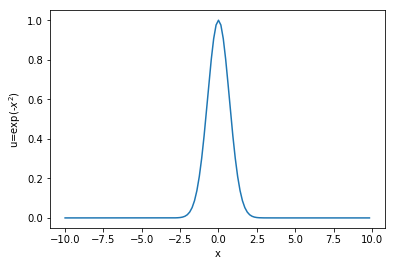

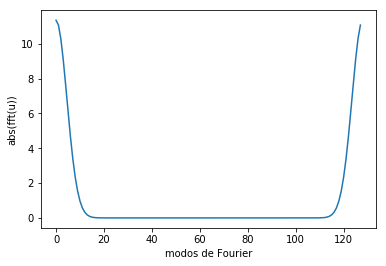

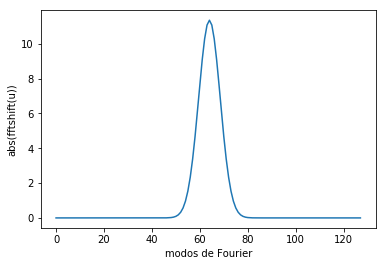

/Users/nvalencia/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


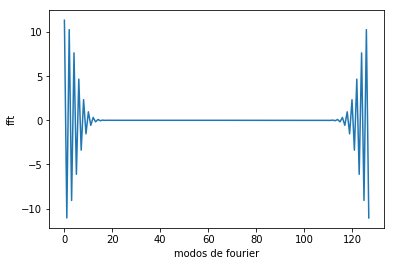

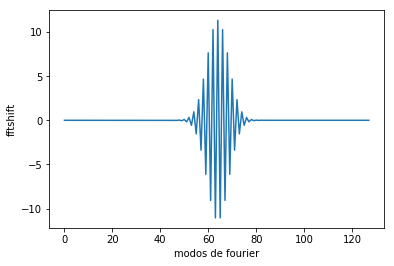

In [115]:
L=20 #definición de dominio computacional [-L/2,L/2]
n=128 #definición de modos de Fourier 2^n
x2=linspace(-L/2,L/2,n+1) #dominio a discretizar
x=x2[0:n] #en la periodicidad se consideran sólo los primeros n puntos

u1=exp(-x*x) #función gaussiana
ut1=fft(u1) # FFT de la función
utshift1=fftshift(ut1) #organiza la transformada en el orden matemático real

plt.plot(x,u1) #graficación de la función gaussiana
plt.xlabel('x')
plt.ylabel('u=exp(-$x^2$)')
plt.show()

plt.plot(abs(ut1)) #graficación de la transformada
plt.xlabel('modos de Fourier') 
plt.ylabel('abs(fft(u))')
plt.show()

plt.plot(abs(utshift1)) #graficación de la transformada organizada
plt.xlabel('modos de Fourier')
plt.ylabel('abs(fftshift(u))')
plt.show()

plot(ut1)
plt.xlabel('modos de fourier')
plt.ylabel('fft')
plt.show()

plt.plot(utshift1)
plt.xlabel('modos de fourier')
plt.ylabel('fftshift')
plt.show()

Se observa, en la segunda gráfica, como el pulso se cambia de posición. Por medio de la función $ffshift$ es posible redgresar a la forma original de la transformada. Este Proceso es normal del método $fft$. Sin embargo, para realizar la transformación inversa, se requiere que la transformada se encuentre en su estado original, es decir, con su contraparte de 'espejo'. La operación anterior se realiza mediante la función $ifft$. La primera gráfiica presenta el comportamiento de la función gaussiana real, mientras que las últimas dos muestran el comportamiento real tanto de la transformada real, como se su correcto ordenamiento.

### FFT versus diferencias finitas

En comparación al método de diferencias finitas, en donde la aproximación de la derivada se realiza de forma local, debido a que cada ecuación sólo es relacionada con sus vecinos, el método de $fft$ se lleva a cabo de forma global al aproximar una derivada, ya que su respectiva expansión de senos y cosenos se expande por todo el dominio. Para este caso, se compara el método de derivación por medio de FFT con los resultados que se obtienen al aproximar la derivada mediante diferencias finitas. Esta aproximación se realiza usando operadores centrados de cuarto orden, con la excepción de que, para el primer punto, se usa una aproximación hacia adelante de segundo orden.

En este caso, se utiliza la siguiente función para el análisis:

$u(x)=sech(x)$

Con sus primeras dos derivadas siendo:

$\frac{du}{dx}=-sech(x)tanh(x)$

$\frac{d^2u}{dx^2}=sech(x)-2sech^3(x)$

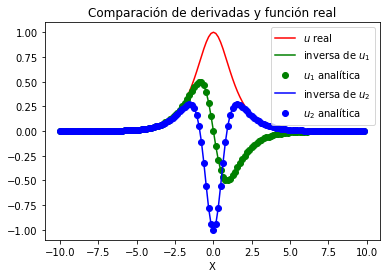

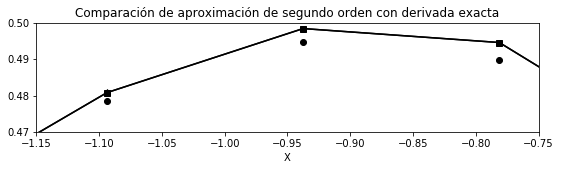

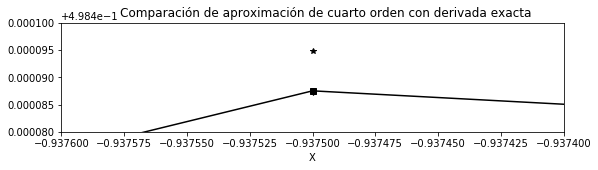

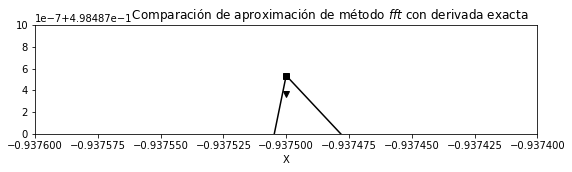

In [118]:
dx=x[1]-x[0] #espaciamiento usado en la discretización
u2=1/np.cosh(x) #función a derivar
ut2=fft(u2) #transformada de la función
k=2*pi/L*np.concatenate((np.arange(0,n/2),np.arange(-n/2,0))) #reescalamiento al dominio 2pi

#cálculo de las derivadas
utprime=1j*k*ut2
utprime2=-k*k*ut2
ureal1=np.real(ifft(utprime))
ureal2=np.real(ifft(utprime2))
analitica1=-1/np.cosh(x)*np.tanh(x) #primera derivada analítica
analitica2=1/np.cosh(x)-2*(1/cosh(x))**3 #segunda derivada analitica

#Cálculo en diferencias finitas de la primera derivada
#Hacia adelante de segundo orden
ux=zeros(n)
ux[0]=(-3*u2[0]+4*u2[1]-u2[2])/(2*dx)
for i in np.arange(1,n-1):
    ux[i]=(u2[i+1]-u2[i-1])/(2*dx)
ux[-1]=(3*u2[-1]-4*u2[-2]+u2[-3])/(2*dx)

#Centrada de cuarto orden
ux2=zeros(n)
ux2[0]=(-3*u2[0]+4*u2[1]-u2[2])/(2*dx) #Se usa en las fronteras hacia adelante de segundo orden
ux2[1]=(-3*u2[1]+4*u2[2]-u2[3])/(2*dx)
for i in np.arange(2,n-2):
    ux2[i]=(-u2[i+2]+8*u2[i+1]-8*u2[i-1]+u2[i-2])/(12*dx)
ux2[-2]=(3*u2[-2]-4*u2[-3]+u2[-4])/(2*dx) #Se usa en las fronteras hacia adelante de segundo orden
ux2[-1]=(3*u2[-1]-4*u2[-2]+u2[-3])/(2*dx)

#plot(x,u2,'r',x,ureal1,'g',x,analitica1,'go',x,ureal2,'b',x,analitica2,'bo')
plot(x,u2,'r',label='$u$ real')
plot(x,ureal1,'g',label='inversa de $u_1$')
plot(x,analitica1,'go',label='$u_1$ analítica')
plot(x,ureal2,'b',label='inversa de $u_2$')
plot(x,analitica2,'bo',label='$u_2$ analítica')
xlabel('X')
legend(loc='best')
title('Comparación de derivadas y función real')
show()

fig1 = plt.figure(figsize=(9, 2))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,analitica1,'ks-',x,ureal1,'k',x,ux,'ko',x,ux2,'k*')
axis([-1.15, -0.75, 0.47, 0.5])
xlabel('X')
title('Comparación de aproximación de segundo orden con derivada exacta')
plt.show()

fig2 = plt.figure(figsize=(9, 2))
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(x,analitica1,'ks-',x,ureal1,'kv',x,ux,'ko',x,ux2,'k*') 
axis([-0.9376, -0.9374, 0.49848, 0.49850])
title('       Comparación de aproximación de cuarto orden con derivada exacta')
xlabel('X')
plt.show()

fig3 = plt.figure(figsize=(9, 2))
ax3 = fig3.add_subplot(1,1,1)
ax3.plot(x,analitica1,'ks-',x,ureal1,'kv',x,ux,'ko',x,ux2,'k*')
xlabel('X')
title('                       Comparación de aproximación de método $fft$ con derivada exacta')
axis([-0.9376, -0.9374, 0.498487, 0.498488])
plt.show()

### 12.2 Aplicaciones del FFT: Detección de radares y filtros 

Para analizar las aplicaciones de filtrado, se analiza una función ideal de secante hiperbólica. Esta es la señal final a la que se desea llegar una vez se realice el proceso de filtración y remoción de ruido.

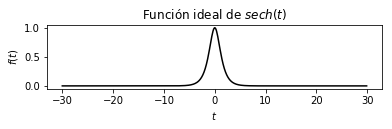

In [119]:
L2=30 #tiempo a discretizar
n2=512 #modos de Fourier 2^9
t2=linspace(-L2,L2,n2+1) 
t=t2[0:n2] #Discrerización del tiempo
k2=(2*pi/(2*L2))*np.concatenate((np.arange(0,n2/2),np.arange(-n2/2,0))) #reescalamiento al dominio 2pi
u3=1/cosh(t) #señal ideal en dominio temporal
figure(1)
subplot(311)
plot(t,u3,'k')
xlabel('$t$')
ylabel('$f(t)$')
title('Función ideal de $sech(t)$')
show()

Este tipo de funciones, como las observadas en la gráfica superior, no son comunes. En realidad, traen consigo lo que se conoce como ruido blanco, el cual afecta por igual todas las frecuencias. Lo que se realiza a continuación es agregar este ruido a la función. Lo anterior se realiza en el dominio frecuencial.

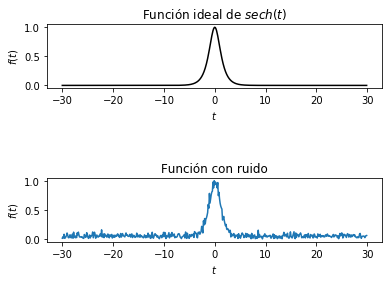

In [120]:
noise=1
utwonoise=fft(u3) #transformada de la función ideal
utn=utwonoise+noise*(randn(n2)+(1j*randn(n2))) #adición del ruido en parte real e imaginaria utilizando valores pseudoaleatotios
u3n=ifft(utn) #inversa de función con ruido incluido
figure(1)
subplot(311)
title('Función ideal de $sech(t)$')
xlabel('$t$')
ylabel('$f(t)$')
plot(t,u3,'k')
subplot(313)
plot(t,abs(u3n))
title('Función con ruido')
xlabel('$t$')
ylabel('$f(t)$')
show()

Aunque, en este caso, la señal real se sigue observando claramente, si se magnifica 10 veces el efecto del ruido, esta ya no se logra observar, como se muestra a continuación:

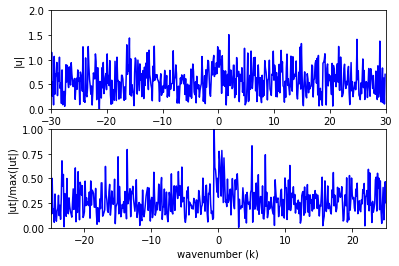

In [121]:
noise2=10
utwonoise2=fft(u3) #transformada de la función ideal
utn2=utwonoise2+noise2*(randn(n2)+(1j*randn(n2))) #adición del ruido en parte real e imaginaria utilizando valores pseudoaleatotios
u3n2=ifft(utn2) #inversa de función con ruido incluido

subplot(211)
plot(t,abs(u3n2),'b')
axis([-30, 30, 0, 2])
xlabel('time (t)')
ylabel('|u|')
subplot(212)
plot(fftshift(k2),abs(fftshift(utn2))/max(abs(fftshift(utn2))),'b')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
axis([-25, 25, 0, 1])
show()

La gráfica superior muestra el comportamiento de la señal en el dominio del tiempo mientras que, en la inferior, se presenta en el dominio frecuencial. Como se observa, aumentando 10 veces la magnitud del ruido impide que se tenga alguna idea de la forma de la señal real, por lo cual se vuelve necesario el uso de la filtración. Uno de los filtros más sencillos que se tienen es el de Fourier, dado por la siguiente ecuación:

$\mathcal{F}(k)=exp(-\tau(k-k_0)^2)$

En este caso, $\tau$ representa el ancho de banda del filtro y $k$ el número de onda. Este funciona como un pasa bajas ya que elemina las altas frecuencias en comparación a $k_0$ y $\tau=0.2$. En este caso, se toma $k_0=0$. A continuación, se muestra este proceso:

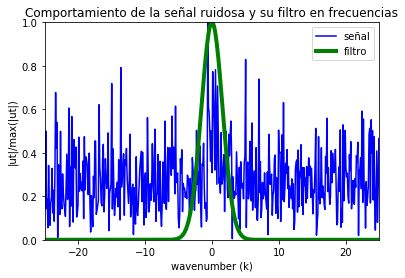

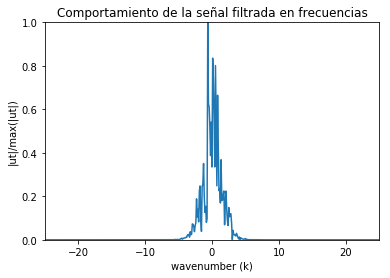

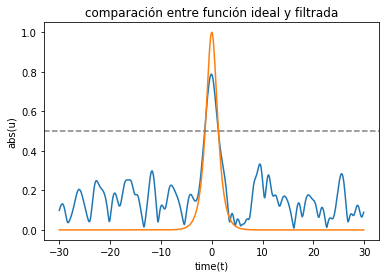

In [122]:
f=exp(-0.2*(k2)**2)
unft=f*utn2
unf=ifft(unft)
plot(fftshift(k2),abs(fftshift(utn2))/max(abs(fftshift(utn2))),'b',label='señal')
plot(fftshift(k2),fftshift(f),'g',label='filtro',lw=4)
axis([-25, 25, 0, 1])
legend(loc='best')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
title('Comportamiento de la señal ruidosa y su filtro en frecuencias')
show()
plot(fftshift(k2),abs(fftshift(unft))/max(abs(fftshift(unft))))
axis([-25,25,0,1])
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
title('Comportamiento de la señal filtrada en frecuencias')
show()
plot(t,abs(unf))
plot(t,u3)
xlabel('time(t)')
ylabel('abs(u)')
axhline(y=0.5,color='grey',linestyle='--')
title('comparación entre función ideal y filtrada')
show()

La primera gráfica muestra el comportamiento de la señal con ruido y la forma del filtro que se le aplica, utilizando un parámetro de ancho de banda de 0.2. Como se observa en los extremos..

Ahora, si se centra la frecuencia en 15:

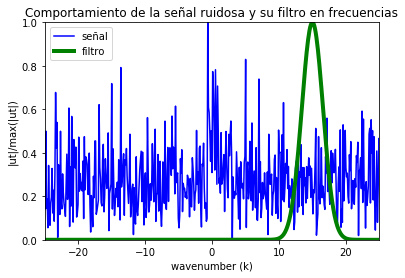

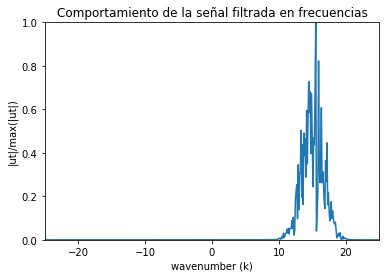

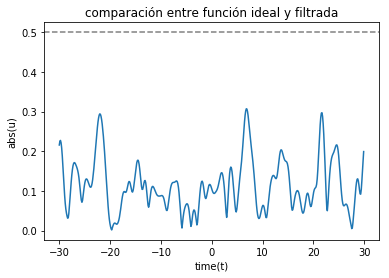

In [123]:
f2=exp(-0.2*(k2-15)**2)
unft2=f2*utn2
unf2=ifft(unft2)

plot(fftshift(k2),abs(fftshift(utn2))/max(abs(fftshift(utn2))),'b',label='señal')
plot(fftshift(k2),fftshift(f2),'g',label='filtro',lw=4)
axis([-25, 25, 0, 1])
legend(loc='best')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
title('Comportamiento de la señal ruidosa y su filtro en frecuencias')
show()
plot(fftshift(k2),abs(fftshift(unft2))/max(abs(fftshift(unft2))))
axis([-25,25,0,1])
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
title('Comportamiento de la señal filtrada en frecuencias')
show()
plot(t,abs(unf2))
xlabel('time(t)')
ylabel('abs(u)')
axhline(y=0.5,color='grey',linestyle='--')
title('comparación entre función ideal y filtrada')
show()



## 12.3 Aplicaciones de la FFT: radares y promedios

/Users/nvalencia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/nvalencia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


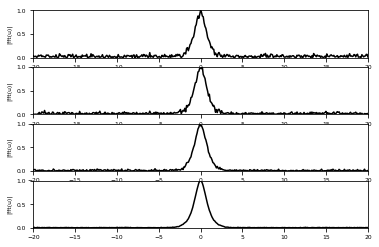

In [222]:
L3=30 #rango de tiempo a analizar
n3=512 # modos de Fourier
T3=linspace(-L3,L3,n3+1)
t3=T3[0:n3]
k3=(2*pi/(2*L3)*np.concatenate((np.arange(0,n3/2),np.arange(-n3/2,0)))) #reescalamiento al dominio 2pi
ks=fftshift(k3)
noise3=10
labels=[['(a)'],['(b)'],['(c)'],['(d)']]
realize=[1, 2, 5, 100]
for jj in range(size(realize)):
    u3=1/cosh(t3)
    utn3=zeros((realize[jj],n3))
    ave=zeros(n3) 
    ut3=fft(u3)
    un3=zeros((realize[jj],n3))
    dat=zeros((realize[jj],n3))
    for j in range(realize[jj]):
        utn3[j]=ut3+noise*(randn(n3)+1j*randn(n3))
        ave=ave+utn3[j]
        dat[j]=abs(fftshift(utn3[j]))/max(abs(utn3[j]))
        un3[j]=ifft(utn3[j])
    ave=abs(fftshift(ave))/realize[jj]
    subplot(4,1,jj+1)
    plot(ks,ave/max(ave),'k')
    rc('font', size=6) 
    axis([-20, 20, 0, 1])
    ylabel('|fft(u)|')